In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
kaggle_df = pd.read_csv('/Users/david/code/dmassonfr/Spotify_hit_predictor/raw_data/kaggle_complete_df.csv')
kaggle_df

,Unnamed: 0,track_id,track_name,track_popularity,duration_ms,artists,artists_ids,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,first_artist_id,followers,genres,artist_popularity
0,93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.6960,...,0.1190,0.3210,0.000000,0.4200,0.464,90.030,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100.0
1,93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.4360,...,0.0601,0.7210,0.000013,0.1050,0.132,143.874,1McMsnEElThX1knmY4oliG,1444702.0,"['pop', 'post-teen pop']",88.0
2,93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.6950,...,0.0913,0.1750,0.000000,0.1500,0.472,149.996,1uU7g3DNSbsu0QjSEqZtEd,177401.0,['australian hip hop'],85.0
3,92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.8260,...,0.0309,0.0212,0.000012,0.5430,0.644,118.051,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"['canadian contemporary r&b', 'canadian pop', ...",96.0
4,92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.5240,...,0.0502,0.1120,0.000000,0.2030,0.553,83.970,1U1el3k54VvEUzo3ybLPlM,1698014.0,"['colombian pop', 'pop']",88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,1741,6Kvpaa18KXYbeHGIlqwVv1,A Monday Date,0,191400,['Louis Armstrong & His Hot Five'],['0t4VVR2T9Sb0z3NdDdEU6S'],1925,0.804,0.3120,...,0.4760,0.9630,0.002620,0.1510,0.716,117.446,0t4VVR2T9Sb0z3NdDdEU6S,21786.0,['new orleans jazz'],34.0
586668,1740,6Kj9ucimZ1hMK3ITjIdTLS,Alma de Cotorro - Remasterizado,0,197627,"['Francisco Canaro', 'Azucena Maizani']","['2maQMqxNnlRrBrS1oAsrX9', '0B2RE6SzZ4QsCRkl1n...",1925-08-02,0.564,0.1870,...,0.1540,0.9960,0.938000,0.6390,0.349,126.804,2maQMqxNnlRrBrS1oAsrX9,16774.0,"['tango', 'vintage tango']",40.0
586669,1739,6HyANrFbuu3k4KqaUDz5Pp,El Sonambulo - Remasterizado,0,143227,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1925-04-25,0.511,0.0299,...,0.0785,0.9950,0.886000,0.0976,0.587,74.344,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",23.0
586670,1738,6Heel9xMFavwKQs3rKJ1hn,Sunshine Baby,0,163667,['Louis Armstrong Jazz Four;Hociel Thomas'],['2qFAOh5MiyuiEMHew9tArW'],1925,0.478,0.2470,...,0.0535,0.9880,0.000002,0.4490,0.702,176.517,2qFAOh5MiyuiEMHew9tArW,49.0,[],0.0


In [3]:
kaggle_df.keys()

Index(['Unnamed: 0', 'track_id', 'track_name', 'track_popularity',
       'duration_ms', 'artists', 'artists_ids', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'first_artist_id',
       'followers', 'genres', 'artist_popularity'],
      dtype='object')

In [4]:
kaggle_df['release_date'] = pd.to_datetime(kaggle_df['release_date'], format= '%Y-%m-%d')

In [5]:
kaggle_df['release_year'] = kaggle_df['release_date'].dt.year

In [6]:
features_df = kaggle_df.filter(['track_popularity', 'duration_ms', 'release_year', 'danceability','energy', 'loudness', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo'], axis=1)

In [7]:
features_df

,track_popularity,duration_ms,release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,100,198082,2021,0.677,0.6960,-6.181,0.1190,0.3210,0.000000,0.4200,0.464,90.030
1,99,242014,2021,0.585,0.4360,-8.761,0.0601,0.7210,0.000013,0.1050,0.132,143.874
2,98,132780,2021,0.778,0.6950,-6.865,0.0913,0.1750,0.000000,0.1500,0.472,149.996
3,97,215627,2020,0.680,0.8260,-5.487,0.0309,0.0212,0.000012,0.5430,0.644,118.051
4,97,160191,2020,0.653,0.5240,-9.016,0.0502,0.1120,0.000000,0.2030,0.553,83.970
...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0,191400,1925,0.804,0.3120,-12.564,0.4760,0.9630,0.002620,0.1510,0.716,117.446
586668,0,197627,1925,0.564,0.1870,-13.437,0.1540,0.9960,0.938000,0.6390,0.349,126.804
586669,0,143227,1925,0.511,0.0299,-25.465,0.0785,0.9950,0.886000,0.0976,0.587,74.344
586670,0,163667,1925,0.478,0.2470,-9.843,0.0535,0.9880,0.000002,0.4490,0.702,176.517


In [8]:
duration_count = (features_df['duration_ms'].value_counts)

In [9]:
duration_count

<bound method IndexOpsMixin.value_counts of 0         198082
1         242014
2         132780
3         215627
4         160191
           ...  
586667    191400
586668    197627
586669    143227
586670    163667
586671    139493
Name: duration_ms, Length: 586672, dtype: int64>

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

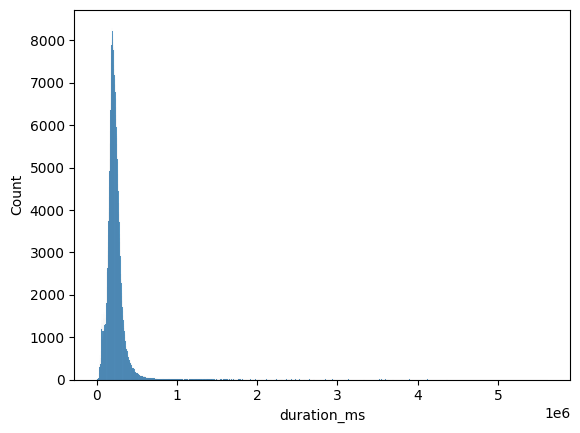

In [10]:
sns.histplot(duration_count, x= features_df['duration_ms'])

In [11]:
# features for 1 song

In [12]:
features_df_1 = features_df.loc[[0], ['track_popularity', 'duration_ms', 'release_year', 'danceability','energy', 'loudness', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo']]
features_df_1

,track_popularity,duration_ms,release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,100,198082,2021,0.677,0.696,-6.181,0.119,0.321,0.0,0.42,0.464,90.03


In [21]:
features_df_1_norm =  features_df_1.copy()
features_df_1_norm['acousticness'] = features_df_1_norm['acousticness'] / features_df['acousticness'].max()
features_df_1_norm['danceability'] = features_df_1_norm['danceability'] / features_df['danceability'].max()
features_df_1_norm['duration_ms'] = features_df_1_norm['duration_ms'] / 1000000 #features_df['duration_ms'].max() #changed to get better scale on plot
features_df_1_norm['energy'] = features_df_1_norm['energy'] / features_df['energy'].max()
features_df_1_norm['instrumentalness'] = features_df_1_norm['instrumentalness'] / features_df['instrumentalness'].max()
features_df_1_norm['liveness'] = features_df_1_norm['liveness'] / features_df['liveness'].max()
features_df_1_norm['speechiness'] = features_df_1_norm['speechiness'] / features_df['speechiness'].max()
features_df_1_norm['tempo'] = features_df_1_norm['tempo'] / features_df['tempo'].max()
features_df_1_norm['valence'] = features_df_1_norm['valence'] / features_df['valence'].max()
features_df_1_norm['track_popularity'] = features_df_1_norm['track_popularity'] / features_df['track_popularity'].max()
features_df_1_norm['loudness'] = features_df_1_norm['loudness'] / features_df['loudness'].min()
features_df_1_norm['release_year'] = features_df['release_year'].astype(str)

In [14]:
"""features_df_1_norm['track_popularity'] = features_df_1['track_popularity'] / track_popularity_max
features_df_1_norm['duration_ms'] = features_df_1['duration_ms'] / duration_ms_max
features_df_1_norm['danceability'] = features_df_1['danceability'] / danceability_max
features_df_1_norm['energy'] = features_df_1['energy'] / energy_max
features_df_1_norm['loudness'] = features_df_1['loudness'] / loudness_max
features_df_1_norm['speechiness'] = features_df_1['speechiness'] / speechiness_max
features_df_1_norm['acousticness'] = features_df_1['acousticness'] / acousticness_max
features_df_1_norm['instrumentalness'] = features_df_1['instrumentalness'] / instrumentalness_max
features_df_1_norm['liveness'] = features_df_1['liveness'] / liveness_max
features_df_1_norm['valence'] = features_df_1['valence'] / valence_max
features_df_1_norm['tempo'] = features_df_1['tempo'] / tempo_max"""

"features_df_1_norm['track_popularity'] = features_df_1['track_popularity'] / track_popularity_max\nfeatures_df_1_norm['duration_ms'] = features_df_1['duration_ms'] / duration_ms_max\nfeatures_df_1_norm['danceability'] = features_df_1['danceability'] / danceability_max\nfeatures_df_1_norm['energy'] = features_df_1['energy'] / energy_max\nfeatures_df_1_norm['loudness'] = features_df_1['loudness'] / loudness_max\nfeatures_df_1_norm['speechiness'] = features_df_1['speechiness'] / speechiness_max\nfeatures_df_1_norm['acousticness'] = features_df_1['acousticness'] / acousticness_max\nfeatures_df_1_norm['instrumentalness'] = features_df_1['instrumentalness'] / instrumentalness_max\nfeatures_df_1_norm['liveness'] = features_df_1['liveness'] / liveness_max\nfeatures_df_1_norm['valence'] = features_df_1['valence'] / valence_max\nfeatures_df_1_norm['tempo'] = features_df_1['tempo'] / tempo_max"

In [22]:
features_df_1_norm

,track_popularity,duration_ms,release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.0,0.198082,2021,0.683148,0.696,0.103017,0.122554,0.322289,0.0,0.42,0.464,0.36541


In [23]:
features_df_1_norm = features_df_1_norm.drop(['release_year'], axis=1)

In [24]:
features_df_1_norm

,track_popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.0,0.198082,0.683148,0.696,0.103017,0.122554,0.322289,0.0,0.42,0.464,0.36541


In [18]:
# avg features (min, max, mean)

In [25]:
features_avg = features_df.describe()
features_avg

,track_popularity,duration_ms,release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,1988.566168,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857
std,18.370642,1.265261e+05,22.831283,0.166103,0.251923,5.089328,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108
min,0.000000,3.344000e+03,1900.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,1974.000000,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000
50%,27.000000,2.148930e+05,1992.000000,0.577000,0.549000,-9.243000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000
75%,41.000000,2.638670e+05,2007.000000,0.686000,0.748000,-6.482000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000
max,100.000000,5.621218e+06,2021.000000,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


In [28]:
features_avg_norm = features_avg.copy()
features_avg_norm['track_popularity'] = features_avg['track_popularity'].loc['mean'] / track_popularity_max
features_avg_norm['duration_ms'] = features_avg['duration_ms'].loc['mean'] / duration_ms_max
features_avg_norm['danceability'] = features_avg['danceability'].loc['mean'] / danceability_max
features_avg_norm['energy'] = features_avg['energy'].loc['mean'] / energy_max
features_avg_norm['loudness'] = features_avg['loudness'].loc['mean'] / loudness_max
features_avg_norm['speechiness'] = features_avg['speechiness'].loc['mean'] / speechiness_max
features_avg_norm['acousticness'] = features_avg['acousticness'].loc['mean'] / acousticness_max
features_avg_norm['instrumentalness'] = features_avg['instrumentalness'].loc['mean'] / instrumentalness_max
features_avg_norm['liveness'] = features_avg['liveness'].loc['mean'] / liveness_max
features_avg_norm['valence'] = features_avg['valence'].loc['mean'] / valence_max
features_avg_norm['tempo'] = features_avg['tempo'].loc['mean'] / tempo_max

In [29]:
features_avg_norm = features_avg_norm.drop(['release_year'], axis=1)

In [ ]:
# features max

In [27]:
track_popularity_max = features_avg.loc['max'][0]
#duration_ms_max = features_avg.loc['max'][1]
duration_ms_max = 1000000 # changed to get better scale for plotting
danceability_max = features_avg.loc['max'][3]
energy_max = features_avg.loc['max'][4]
loudness_max = features_avg.loc['min'][5]
speechiness_max = features_avg.loc['max'][6]
acousticness_max = features_avg.loc['max'][7]
instrumentalness_max = features_avg.loc['max'][8]
liveness_max = features_avg.loc['max'][9]
valence_max = features_avg.loc['max'][10]
tempo_max = features_avg.loc['max'][11]

In [ ]:
# Melting features

In [30]:
features_df_1_norm = pd.melt(features_df_1_norm)

In [31]:
features_avg_norm = pd.melt(features_avg_norm)

In [ ]:
# plotting features for 1 track and avg values for all tracks

In [104]:
fig = px.line_polar(features_df_1_norm, r='value', theta='variable', template="plotly_dark", line_close=True, range_r = (0,1))
fig.update_traces(fill='toself')
fig.update_layout(font_size=15)
fig.show()

fig_avg = px.line_polar(features_avg_norm, r='value', theta='variable', template="plotly_dark", line_close=True, range_r = (0,1))
fig_avg.update_traces(fill='toself', line_color='lightgreen')
fig_avg.update_layout(font_size=15)
fig_avg.show()

/Users/david/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/david/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [106]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(px.line_polar(features_df_1_norm, r='value', theta='variable', template="plotly_dark", line_close=True, range_r = (0,1)))
#fig.add_trace(px.line_polar(features_df_1_norm, r='value', theta='variable', template="plotly_dark", line_close=True, range_r = (0,1)))
fig.update_traces(fill='toself', line_color='lightgreen')
fig.update_layout(font_size=15)
fig.show()

/Users/david/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'value=%{r}<br>variable=%{theta}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'r': array([1.        , 0.198082  , 0.68314834, 0.696     , 0.10301667, 0.12255407,
                          0.32228916, 0.        , 0.42      , 0.464     , 0.36540967, 1.        ]),
              'showlegend': False,
              'subplot': 'polar',
              'theta': array(['track_popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                              'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                              'valence', 'tempo', 'track_popularity'], dtype=object),
              'type': 'scatterpolar'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'polar': {'angularaxis': {'direction': 'clockwise', 'rotation': 90},
                         'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'radialaxis': {'range': [0, 1]}},
               'template': '...'}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [74]:
px.bar_polar(features_df_1_norm, r='value', theta='variable', range_r = (0,1),
                   color="value", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.algae)

In [72]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = features_df_1_norm['value'] ,theta= features_df_1_norm['variable'], fill='toself'))
fig.add_trace(go.Scatterpolar(r = features_avg_norm['value'] ,theta= features_avg_norm['variable'], fill='toself'))

fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1])),showlegend=True)

fig.show()

# Max audio_features_values

In [78]:
audio_features_max = pd.DataFrame()

In [88]:
track_popularity_max = features_avg.loc['max'][0]
duration_ms_max = features_avg.loc['max'][1]
danceability_max = features_avg.loc['max'][3]
energy_max = features_avg.loc['max'][4]
loudness_max = features_avg.loc['min'][5]
speechiness_max = features_avg.loc['max'][6]
acousticness_max = features_avg.loc['max'][7]
instrumentalness_max = features_avg.loc['max'][8]
liveness_max = features_avg.loc['max'][9]
valence_max = features_avg.loc['max'][10]
tempo_max = features_avg.loc['max'][11]

In [90]:
audio_features_max = pd.DataFrame({'track_popularity_max': track_popularity_max,
              'duration_ms_max': duration_ms_max,
              'danceability_max' : danceability_max,
              'energy_max': energy_max,
              'loudness_max': loudness_max,
              'speechiness_max': speechiness_max,
              'acousticness_max': acousticness_max,
              'instrumentalness_max' : instrumentalness_max,
              'liveness_max': liveness_max,
              'valence_max': valence_max,
              'tempo_max': tempo_max}, index=[0],
            columns=['track_popularity_max','duration_ms_max','danceability_max','energy_max','loudness_max','speechiness_max','acousticness_max', 'instrumentalness_max', 'liveness_max', 'valence_max', 'tempo_max'])
audio_features_max

,track_popularity_max,duration_ms_max,danceability_max,energy_max,loudness_max,speechiness_max,acousticness_max,instrumentalness_max,liveness_max,valence_max,tempo_max
0,100.0,5621218.0,0.991,1.0,-60.0,0.971,0.996,1.0,1.0,1.0,246.381


In [93]:
audio_features_max.to_csv('audio_features_max.csv')

# Avg audio_features_values

In [91]:
track_popularity_avg = features_avg.loc['mean'][0]
duration_ms_avg = features_avg.loc['mean'][1]
danceability_avg = features_avg.loc['mean'][3]
energy_avg = features_avg.loc['mean'][4]
loudness_avg = features_avg.loc['mean'][5]
speechiness_avg = features_avg.loc['mean'][6]
acousticness_avg = features_avg.loc['mean'][7]
instrumentalness_avg = features_avg.loc['mean'][8]
liveness_avg = features_avg.loc['mean'][9]
valence_avg = features_avg.loc['mean'][10]
tempo_avg = features_avg.loc['mean'][11]

In [92]:
audio_features_avg = pd.DataFrame({'track_popularity_avg': track_popularity_avg,
              'duration_ms_avg': duration_ms_avg,
              'danceability_avg' : danceability_avg,
              'energy_avg': energy_avg,
              'loudness_avg': loudness_avg,
              'speechiness_avg': speechiness_avg,
              'acousticness_avg': acousticness_avg,
              'instrumentalness_avg' : instrumentalness_avg,
              'liveness_avg': liveness_avg,
              'valence_avg': valence_avg,
              'tempo_avg': tempo_avg}, index=[0],
            columns=['track_popularity_avg','duration_ms_avg','danceability_avg','energy_avg','loudness_avg','speechiness_avg','acousticness_avg', 'instrumentalness_avg', 'liveness_avg', 'valence_avg', 'tempo_avg'])
audio_features_avg

,track_popularity_avg,duration_ms_avg,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg
0,27.570053,230051.167286,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857


In [94]:
audio_features_avg.to_csv('audio_features_avg.csv')